# PDS Graded Project - 3 
# Web Development Using Flask

### Domain -
Finance and Banking

### Context -
<p style = "text-align:justify;">
    Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan
</p>

### Project Objective -
<p style="text-align:justify">
    <strong>1.</strong> This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
</p>

<p style="text-align:justify">
   <strong>2.</strong> To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not. 
</p>

### Dataset Description -

1. **Loan ID** - Unique Loan ID
2. **Gender** - Male or Female
3. **Married** - Applicant Married (Y/N)
4. **Dependents** - Number of Dependents
5. **Self Employed** - Self Employed (Y/N)
6. **Education** - Graduate/Undergraduate
7. **Applicant Income** - Applicant Income (in dollars)
8. **Co Applicant Income** - Co Applicant Income (in dollars)
9. **Loan Amount** - Loan Amount in Thousands (in dollars)
10. **Loan Amount Term** - Term of loan in months
11. **Credit History** - Credit History meets Guidelines Yes/No (1/0)
12. **Property Area** - Urban/Semi-Urban/Rural
13. **Loan Status (Target)** - Loan Approved (Y/N)

## 1. Import required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
284,lp001922,male,yes,0.0,graduate,no,20667,0.0,NaN,360.0,1.0,rural,n
491,lp002562,male,yes,1.0,not graduate,no,5333,1131.0,186.0,360.0,NaN,urban,y
612,lp002984,male,yes,2.0,graduate,no,7583,0.0,187.0,360.0,1.0,urban,y
473,lp002522,female,no,0.0,graduate,yes,2500,0.0,93.0,360.0,NaN,urban,y
192,lp001657,male,yes,0.0,not graduate,no,6033,0.0,160.0,360.0,1.0,urban,n


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


- The dataset consists of 614 entries with 13 columns. 
- The data types in the dataset include numerical (6 columns) and categorical (7 columns). 
- Some columns have missing values.

In [6]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


From the above we can infer the following -

- **dependents** - There are 599 entries. The average (mean) number of dependents is approximately 0.76, with a standard deviation of about 1.02. The minimum number of dependents is 0, and the maximum is 3. The median (50th percentile) is 0, with the 25th percentile also at 0 and the 75th percentile at 2.

- **applicantincome** - There are 614 entries. The average income of the applicants is approximately 5403.46, with a standard deviation of about 6109.04. The minimum income is 150, and the maximum is 81000. The median income is 3812.5, with the 25th percentile at 2877.5 and the 75th percentile at 5795.

- **coapplicantincome** - There are 614 entries. The average income of the co-applicants is approximately 1621.25, with a standard deviation of about 2926.25. The minimum income is 0, and the maximum is 41667. The median income is 1188.5, with the 25th percentile at 0 and the 75th percentile at 2297.25.

- **loanamount** - There are 592 entries. The average loan amount is approximately 146,412, with a standard deviation of about 85,587. The minimum loan amount is 9,000, and the maximum is 700,000. The median loan amount is 128,000, with the 25th percentile at 100,000 and the 75th percentile at 168,000.

- **loan_amount_term** - There are 600 entries. The average loan term is approximately 342 months, with a standard deviation of about 65.12 months. The minimum loan term is 12 months, and the maximum is 480 months. The median loan term is at 360 months, which is same as lower (25%) and upper (75%) quartiles.

- **credit_history** - There are a total of 564 entries, with an average value of approximately 0.84, suggesting that a majority of entries have a credit history.

In [7]:
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


From the above we can infer the following -

- **gender** - There are 601 entries. The most frequent is ‘male’, appearing 489 times.
- **married** - There are 611 entries. The most frequent is ‘yes’, appearing 398 times.
- **education** - There are 614 entries. The most frequent is ‘graduate’, appearing 480 times.
- **self_employed** - There are 582 entries. The most frequent is ‘no’, appearing 500 times.
- **property_area** - There are 614 entries. The most frequent is ‘semiurban’, appearing 233 times.
- **loan_status** - There are 614 entries. The most frequent is ‘y’, appearing 422 times. This means in most cases loan was approved.

## 3. Check for missing values in the dataset, if present? Handle them with appropriate methods and Drop redundant features.

In [8]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

We can infer the below -

**Categorical -**
- **gender** - Approximately 2.12% of the entries are missing.
- **married** - Approximately 0.49% of the entries are missing.
- **self_employed** - Approximately 5.21% of the entries are missing.

**Numerical -**
- **dependents** - Approximately 2.44% of the entries are missing.
- **loanamount** - Approximately 3.58% of the entries are missing.
- **loan_amount_term** - Approximately 2.28% of the entries are missing.
- **credit_history** - Approximately 8.14% of the entries are missing.

#### Filling the Missing Values of the above features with the following method -

- **Gender, Married, Self_Employed** - These are categorical variables. Since the missing values are relatively low (2.12%, 0.49%, and 5.21% respectively), we are filling the missing values with the most frequent category (Mode) - ‘male’ for Gender, ‘yes’ for Married, and ‘no’ for Self_Employed.

- **Dependents** - This is a numerical variable with a discrete number of values (0 to 3). Given that 50% of the entries have 0 dependents and the mean is close to 0 (0.76), we are filling the missing values with 0.

- **LoanAmount** - This is a continuous numerical variable. Given that the mean (146,412) and median (128,000) are not too far apart, we are using the median which would be better if there are any outliers.

- **Loan_Amount_Term** - This is a numerical variable. Given that 75% of loans have a term of 360 months and the median is also 360 months, we are filling the missing values with the median which is 360 months.

- **Credit_History** - This is a binary variable (1/0). Given that about 84% of entries have a credit history (mean = 0.84), we are filling the missing values with 1.

In [9]:
df["gender"].fillna(df['gender'].mode()[0], inplace = True)
df['married'].fillna(df['married'].mode()[0], inplace=True)
df['self_employed'].fillna(df['self_employed'].mode()[0], inplace=True)

df['dependents'].fillna(0.0, inplace=True)
df['loanamount'].fillna(df['loanamount'].median(), inplace=True)
df['loan_amount_term'].fillna(df['loan_amount_term'].median(), inplace=True)
df['credit_history'].fillna(1.0, inplace=True)

In [10]:
df.isnull().sum().sum()

0

#### Dropping the feature 'Loan ID'

In [11]:
df.drop('loan_id',axis=1,inplace=True)

In [12]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0.0,graduate,no,5849,0.0,128.0,360.0,1.0,urban,y
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [13]:
df['dependents'] = df['dependents'].astype(int)
df['credit_history'] = df['credit_history'].astype(int)
df['loan_amount_term'] = df['loan_amount_term'].astype(int)
df['coapplicantincome'] = df['coapplicantincome'].astype(int)
df['loanamount'] = (df['loanamount'] * 1000).astype(int)

In [14]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0,128000,360,1,urban,y
1,male,yes,1,graduate,no,4583,1508,128000,360,1,rural,n
2,male,yes,0,graduate,yes,3000,0,66000,360,1,urban,y
3,male,yes,0,not graduate,no,2583,2358,120000,360,1,urban,y
4,male,no,0,graduate,no,6000,0,141000,360,1,urban,y


## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. 

#### Loan Status by Gender

In [15]:
crosstab = pd.crosstab(df['gender'], df['loan_status'])
crosstab

loan_status,n,y
gender,,
female,37,75
male,155,347


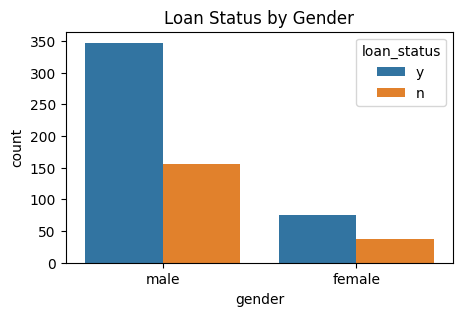

In [16]:
plt.figure(figsize=(5,3))

sns.countplot(x='gender', hue='loan_status', data=df)
plt.title('Loan Status by Gender')
plt.show()

- For ‘female’ applicants, 37 were not approved for a loan while 75 were approved.
- For ‘male’ applicants, 155 were not approved for a loan while 347 were approved.

#### Loan Status by Married

In [17]:
crosstab = pd.crosstab(df['married'], df['loan_status'])
crosstab

loan_status,n,y
married,,
no,79,134
yes,113,288


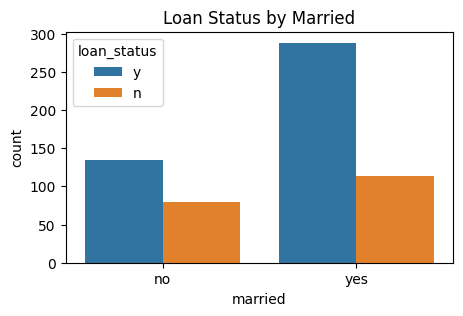

In [18]:
plt.figure(figsize=(5,3))

sns.countplot(x='married', hue='loan_status', data=df)
plt.title('Loan Status by Married')
plt.show()

- For applicants who are not married (‘no’), 79 were not approved for a loan while 134 were approved.
- For applicants who are married (‘yes’), 113 were not approved for a loan while 288 were approved.
- This suggests that, in this dataset, married applicants have a higher number of approvals compared to unmarried applicants.

#### Loan Status by Education

In [19]:
crosstab = pd.crosstab(df['education'], df['loan_status'])
crosstab

loan_status,n,y
education,,
graduate,140,340
not graduate,52,82


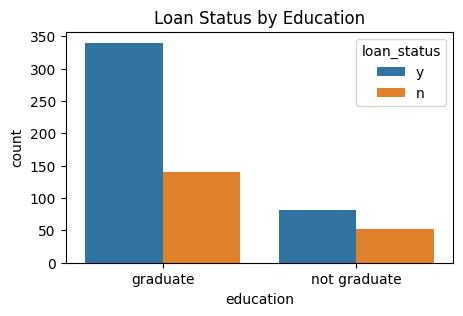

In [20]:
plt.figure(figsize=(5,3))

sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Loan Status by Education')
plt.show()

- For ‘graduate’ applicants, 140 were not approved for a loan while 340 were approved.
- For ‘not graduate’ applicants, 52 were not approved for a loan while 82 were approved.
- This suggests that, in this dataset, graduate applicants have a higher number of approvals compared to non-graduate applicants.

#### Loan Status by Self Employed

In [21]:
crosstab = pd.crosstab(df['self_employed'], df['loan_status'])
crosstab

loan_status,n,y
self_employed,,
no,166,366
yes,26,56


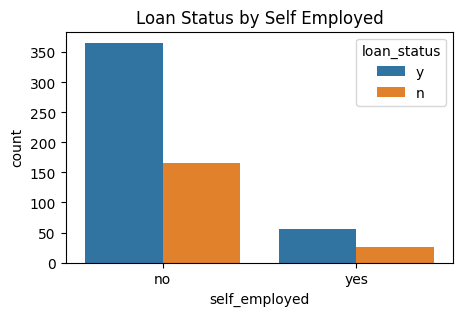

In [22]:
plt.figure(figsize=(5,3))

sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Loan Status by Self Employed')
plt.show()

- For applicants who are not self-employed (‘no’), 166 were not approved for a loan while 366 were approved.
- For applicants who are self-employed (‘yes’), 26 were not approved for a loan while 56 were approved.
- This suggests that, in this dataset, non-self-employed applicants have a higher number of approvals compared to self-employed applicants.

#### Loan Status by Property Area

In [23]:
crosstab = pd.crosstab(df['property_area'], df['loan_status'])
crosstab

loan_status,n,y
property_area,,
rural,69,110
semiurban,54,179
urban,69,133


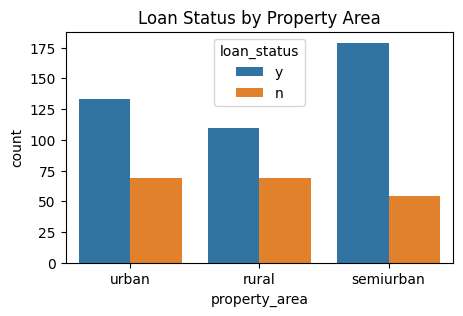

In [24]:
plt.figure(figsize=(5,3))

sns.countplot(x='property_area', hue='loan_status', data=df)
plt.title('Loan Status by Property Area')
plt.show()

- For applicants with properties in 'urban' areas, 69 were not approved for a loan while 133 were approved.
- For applicants with properties in 'rural' areas, 69 were not approved for a loan while 110 were approved.
- For applicants with properties in 'semiurban' areas, 54 were not approved for a loan while 179 were approved.
- This suggests that, in this dataset, there are more approvals for applicants from semiurban areas compared to rural and urban areas. - - The number of 'not approved loans' is fairly similar across all property areas.

In [25]:
data = df.copy()

## 5. Encode the categorical data.

In [26]:
label = LabelEncoder()

columns_encode = df.select_dtypes(include=['object']).columns

for column in columns_encode:
    df[column] = label.fit_transform(df[column])

In [27]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0,128000,360,1,2,1
1,1,1,1,0,0,4583,1508,128000,360,1,0,0
2,1,1,0,0,1,3000,0,66000,360,1,2,1
3,1,1,0,1,0,2583,2358,120000,360,1,2,1
4,1,0,0,0,0,6000,0,141000,360,1,2,1


In [28]:
df_counts = df['gender'].value_counts()
data_counts = data['gender'].value_counts()
print(df_counts)
print(data_counts)

gender
1    502
0    112
Name: count, dtype: int64
gender
male      502
female    112
Name: count, dtype: int64


In [29]:
df_counts = df['married'].value_counts()
data_counts = data['married'].value_counts()
print(df_counts)
print(data_counts)

married
1    401
0    213
Name: count, dtype: int64
married
yes    401
no     213
Name: count, dtype: int64


In [30]:
df_counts = df['education'].value_counts()
data_counts = data['education'].value_counts()
print(df_counts)
print(data_counts)

education
0    480
1    134
Name: count, dtype: int64
education
graduate        480
not graduate    134
Name: count, dtype: int64


In [31]:
df_counts = df['self_employed'].value_counts()
data_counts = data['self_employed'].value_counts()
print(df_counts)
print(data_counts)

self_employed
0    532
1     82
Name: count, dtype: int64
self_employed
no     532
yes     82
Name: count, dtype: int64


In [32]:
df_counts = df['property_area'].value_counts()
data_counts = data['property_area'].value_counts()
print(df_counts)
print(data_counts)

property_area
1    233
2    202
0    179
Name: count, dtype: int64
property_area
semiurban    233
urban        202
rural        179
Name: count, dtype: int64


**Noting the following -**

**Gender -**
- Male = 1
- Female = 0

**Married -**
- Yes = 1
- No = 0

**Education -**
- Graduate = 0
- Not Graduate = 1

**Self Employed -**
- Yes = 1
- No = 0

**Property Area -**
- Semi-Urban = 1
- Urban = 2
- Rural = 0

## 6. Separate the target and independent features and split the data into train and test. 

In [33]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [35]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


In [36]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

## 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [37]:
rf = RandomForestClassifier()

model = rf.fit(X_train,y_train)

test_predictions = model.predict(X_test)

test_accuracy = accuracy_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)


print("Test Accuracy = " , test_accuracy)
print("Test F1 Score = " , test_f1)
print("Test Precision = " , test_precision)
print("Test Recall = " , test_recall)


Test Accuracy =  0.772972972972973
Test F1 Score =  0.8444444444444444
Test Precision =  0.7702702702702703
Test Recall =  0.9344262295081968


Based on the above scores, we can say that the model has a high recall but comparatively lower precision. This means that the model is able to identify the positives well (low false negatives) but it also predicts more false positives leading to lower precision score.

In [38]:
import pickle
pickle.dump(rf, open('model.pkl','wb'))
print('Model Created!')

Model Created!


## Python Flask Application development 

## 1. Creating a project and virtual environment using pycharm or visual studio code and installing the required packages.

## 2. In app.py

**This is our main application file that is designed to call some of the implemented APIs and methods, such as connecting to the MYSQL database and creating a table for the database, and APIs such as user to register, login, enter_details, predict, and logout.**

- Connect to the MYSQL database and create the class for the table. 
User (id, username, password) can create the table in the database using mysql workbench also.

- Register - This is a register API. This should take username and password and store the details in the user database.

- Login - This API should take the username and password of registered users and successfully log them in.

- Enter Details - This API should render the ‘predict.html’ page, where the user has to enter their details to check the loan eligibility.

- Predict - This API should render the prediction results on the HTML template.

- Logout - This API should logout the user.